In [1]:
# Importing all the required modules
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats

#statsmodels:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2

#scikit-learn:
import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

# for KNN with scikit-learn:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
#These are utility tools of the DMBA book. Install the "dmba" package first (just one time)
!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.7 MB/s eta 0:00:00
Colab environment detected.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# importing the entire dataset
world_data = pd.read_csv('/content/drive/MyDrive/Large_dataset/worlddata.csv')
world_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [6]:
for column in world_data.columns:
    mode_value = world_data[column].mode()[0]
    world_data[column].fillna(mode_value, inplace=True)


print("Missing values:\n", world_data.isnull().sum())

<ipython-input-6-6c6cc531868d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  world_data[column].fillna(mode_value, inplace=True)
<ipython-input-6-6c6cc531868d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Missing values:
 CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64


In [7]:
# Filter the dataset for relevant indicators
selected_indicators_1 = [
    "Adult literacy rate, population 15+ years, both sexes (%)",
    "Adult literacy rate, population 15+ years, female (%)",
    "Adult literacy rate, population 15+ years, male (%)"
]

# Filter the data based on the selected indicators
filtered_data_A1 = world_data[world_data["IndicatorName"].isin(selected_indicators_1)]
filtered_data_A1.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
325619,Grenada,GRD,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,1970,96.00000
325620,Grenada,GRD,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,1970,96.00000
325621,Grenada,GRD,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,1970,96.00000
655390,Burkina Faso,BFA,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,1975,8.68515
655391,Burkina Faso,BFA,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,1975,3.18277


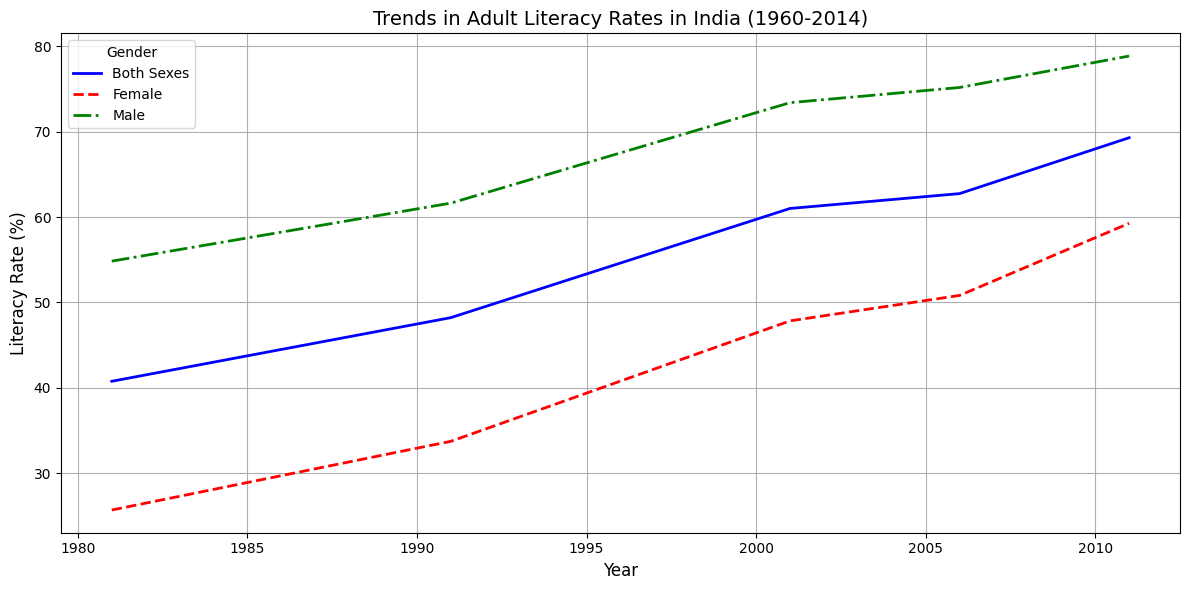

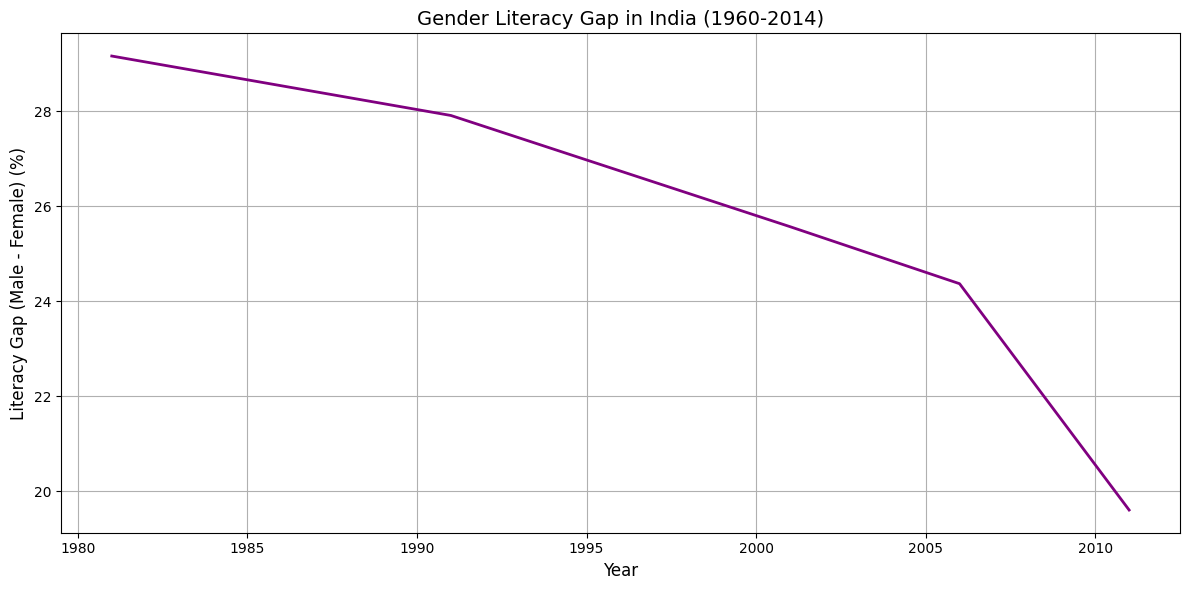

In [8]:
india_data = filtered_data_A1[filtered_data_A1["CountryName"] == "India"]


india_both_sexes = india_data[india_data["IndicatorName"] == "Adult literacy rate, population 15+ years, both sexes (%)"]
india_female = india_data[india_data["IndicatorName"] == "Adult literacy rate, population 15+ years, female (%)"]
india_male = india_data[india_data["IndicatorName"] == "Adult literacy rate, population 15+ years, male (%)"]


plt.figure(figsize=(12, 6))
plt.plot(india_both_sexes["Year"], india_both_sexes["Value"], label="Both Sexes", color='blue', linewidth=2)
plt.plot(india_female["Year"], india_female["Value"], label="Female", color='red', linestyle='--', linewidth=2)
plt.plot(india_male["Year"], india_male["Value"], label="Male", color='green', linestyle='-.', linewidth=2)

plt.title("Trends in Adult Literacy Rates in India (1960-2014)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Literacy Rate (%)", fontsize=12)
plt.legend(title="Gender")
plt.grid(True)
plt.tight_layout()

plt.show()

india_gap = india_male.set_index("Year")["Value"] - india_female.set_index("Year")["Value"]

# gender literacy gap over time
plt.figure(figsize=(12, 6))
plt.plot(india_gap.index, india_gap, color='purple', linewidth=2)
plt.title("Gender Literacy Gap in India (1960-2014)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Literacy Gap (Male - Female) (%)", fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


Analysis of Literacy Trends in India (1981-2011):
Overall Increase in Literacy Rates:

Initial Literacy Rate (Both Sexes): 40.76% (in 1981)
Final Literacy Rate (Both Sexes): 69.30% (in 2011)
Change: The literacy rate for both sexes increased by 28.54 percentage points over the 30-year period.
Male Literacy Trends:

Initial Male Literacy Rate: 54.84%
Final Male Literacy Rate: 78.88%
Change: Male literacy increased by 24.04 percentage points.
Female Literacy Trends:

Initial Female Literacy Rate: 25.68%
Final Female Literacy Rate: 59.28%
Change: Female literacy saw a significant increase of 33.60 percentage points, indicating a faster growth rate compared to males.
Gender Literacy Gap:

Initial Gap (1981): 29.16 percentage points (male literacy rate was much higher than female literacy rate).
Final Gap (2011): 19.60 percentage points.
Reduction in Gap: The gender gap in literacy decreased by 9.56 percentage points, showing progress toward gender equality in education.
Conclusion:
India made substantial progress in improving literacy rates between 1981 and 2011, with the most significant gains observed in female literacy.
Despite this progress, a noticeable gender gap persisted, although it was reduced by about 9.56 percentage points.

Trends in Adult Literacy Rates (1960-2014):

The literacy rates for both sexes, males, and females have shown a steady upward trend over the years.
Male literacy rates have consistently been higher than female literacy rates, indicating a persistent gender gap.
Female literacy rates have improved significantly, showing faster growth, especially after the 1990s.
Gender Literacy Gap:

The gap between male and female literacy rates has been decreasing over time, indicating progress toward gender equality in education.
However, there is still a noticeable gap, even in the most recent years of the dataset.

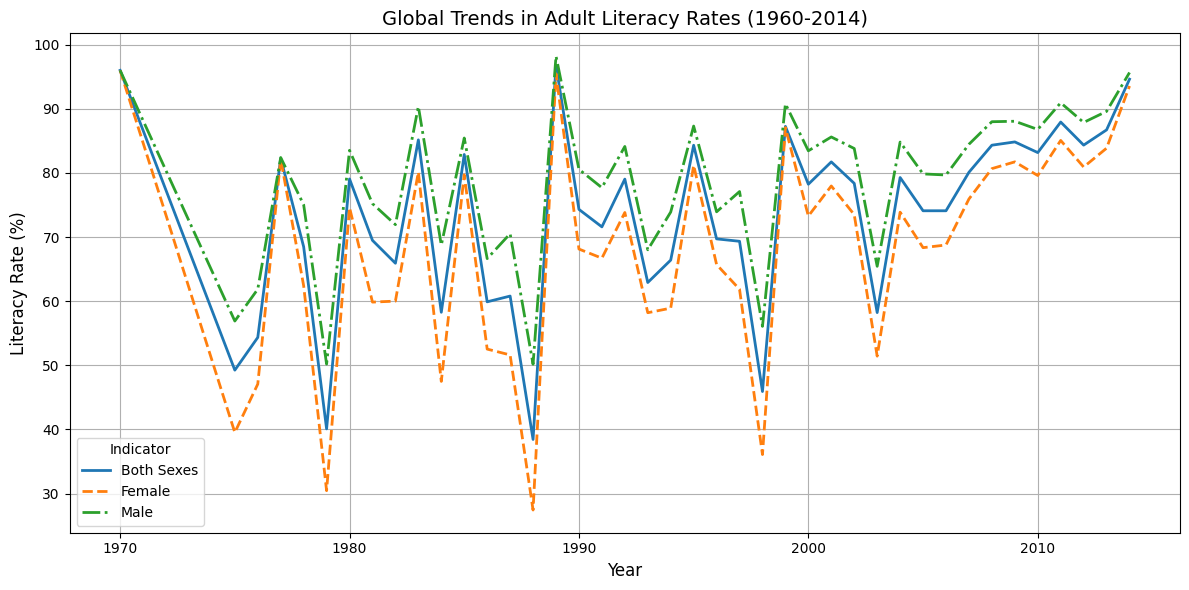

In [9]:
trend_data = filtered_data_A1.groupby(["Year", "IndicatorName"])["Value"].mean().unstack()

# gender literacy trends over time
plt.figure(figsize=(12, 6))
plt.plot(trend_data.index, trend_data["Adult literacy rate, population 15+ years, both sexes (%)"], label="Both Sexes", linewidth=2)
plt.plot(trend_data.index, trend_data["Adult literacy rate, population 15+ years, female (%)"], label="Female", linestyle='--', linewidth=2)
plt.plot(trend_data.index, trend_data["Adult literacy rate, population 15+ years, male (%)"], label="Male", linestyle='-.', linewidth=2)


plt.title("Global Trends in Adult Literacy Rates (1960-2014)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Literacy Rate (%)", fontsize=12)
plt.legend(title="Indicator")
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


### Explanation of the Trends and Dips in Global Literacy Rates

The trend analysis shows a steady increase in global adult literacy rates over the decades, but there are notable dips at certain points. Here’s an exploration of the possible reasons behind these fluctuations:

1. **Inconsistent or Missing Data Reporting**:
   - The observed dips may not reflect actual declines in literacy but could be due to inconsistent reporting or missing data for specific countries and years.
   - If countries with higher literacy rates did not report data in certain years, it could lower the global average, creating the appearance of a decline.

2. **Socio-Economic and Political Factors**:
   - **Wars and Conflicts**: Disruptions caused by wars and civil conflicts (e.g., conflicts in Africa, Latin America, and parts of Asia during the 1970s and 1980s) negatively impacted educational systems, leading to declines in literacy rates in affected regions.
   - **Economic Crises**: Economic downturns reduce funding for education, resulting in fewer educational opportunities and potentially stagnating or declining literacy rates.

3. **Changes in Data Collection Methodology**:
   - Shifts in how literacy rates were measured (e.g., moving from self-reported data to standardized literacy assessments) may have revealed lower literacy levels, causing apparent dips.
   - Additionally, changes in the definition of literacy by some countries over time could also impact the reported rates.

4. **Regional Disparities**:
   - Global averages are heavily influenced by populous countries. If large countries like India or China reported lower literacy rates during certain periods, it could significantly impact the global trend.
   - Many developing countries faced challenges in improving literacy rates, particularly during earlier decades due to limited access to education, especially for women.

5. **Narrowing Gender Gap**:
   - The narrowing gap between male and female literacy rates, particularly after the 1980s, indicates significant progress in women's education.
   - This can be attributed to global initiatives like the **Millennium Development Goals (MDGs)** and **Education for All (EFA)**, which focused on improving access to education for girls and women.
   - Increased efforts in developing countries to address gender inequality in education have also contributed to this positive trend.

In summary, while the overall trend shows progress in global literacy rates, the observed dips can largely be explained by socio-political disruptions, data inconsistencies, and methodological changes in data collection. The narrowing gender gap highlights the effectiveness of global initiatives and policy changes aimed at improving educational access for women.


In [10]:
relevant_indicators = [
    "Adolescent fertility rate (births per 1,000 women ages 15-19)",
    "Age dependency ratio (% of working-age population)",
    "Age dependency ratio, old (% of working-age population)",
    "Age dependency ratio, young (% of working-age population)",
    "Birth rate, crude (per 1,000 people)",
    "Death rate, crude (per 1,000 people)",
    "Fertility rate, total (births per woman)",
    "Fixed telephone subscriptions",
    "Fixed telephone subscriptions (per 100 people)",
    "Life expectancy at birth, female (years)",
    "Life expectancy at birth, male (years)",
    "Life expectancy at birth, total (years)",
    "Mobile cellular subscriptions",
    "Mobile cellular subscriptions (per 100 people)",
    "Population ages 65 and above (% of total)",
    "Population in the largest city (% of urban population)",
    "Population in urban agglomerations of more than 1 million (% of total population)",
    "Population, ages 0-14 (% of total)",
    "Population, ages 15-64 (% of total)",
    "Population, female (% of total)",
    "Population, total",
    "Rural population",
    "Population growth (annual %)",
    "Population in largest city",
    "Population in urban agglomerations of more than 1 million",
    "Rural population growth (annual %)",
    "Internet users (per 100 people)",
    "Population density (people per sq. km of land area)",
    "Enrolment in primary education, both sexes (number)",
    "Enrolment in secondary education, both sexes (number)",
    "Enrolment in secondary general, both sexes (number)",
    "Enrolment in secondary vocational, both sexes (number)",
    "Gross enrolment ratio, pre-primary, both sexes (%)",
    "Gross enrolment ratio, pre-primary, female (%)",
    "Gross enrolment ratio, pre-primary, male (%)",
    "Gross enrolment ratio, primary and secondary, gender parity index (GPI)",
    "Gross enrolment ratio, primary, both sexes (%)",
    "Gross enrolment ratio, primary, female (%)",
    "Gross enrolment ratio, primary, gender parity index (GPI)",
    "Gross enrolment ratio, primary, male (%)",
    "Gross enrolment ratio, secondary, both sexes (%)",
    "Gross enrolment ratio, secondary, female (%)",
    "Gross enrolment ratio, secondary, gender parity index (GPI)",
    "Gross enrolment ratio, secondary, male (%)",
    "Gross enrolment ratio, tertiary, both sexes (%)",
    "Gross enrolment ratio, tertiary, female (%)",
    "Gross enrolment ratio, tertiary, gender parity index (GPI)",
    "Gross enrolment ratio, tertiary, male (%)",
    "Net enrolment rate, primary, both sexes (%)",
    "Net enrolment rate, primary, female (%)",
    "Net enrolment rate, primary, male (%)",
    "Net enrolment rate, secondary, both sexes (%)",
    "Net enrolment rate, secondary, female (%)",
    "Net enrolment rate, secondary, male (%)",
    "Percentage of students in primary education who are female (%)",
    "Percentage of students in secondary education who are female (%)",
    "Percentage of students in secondary general education who are female (%)",
    "Percentage of students in secondary vocational education who are female (%)",
    "Percentage of teachers in primary education who are female (%)",
    "Percentage of teachers in secondary education who are female (%)",
    "Primary completion rate, both sexes (%)",
    "Primary completion rate, female (%)",
    "Primary completion rate, male (%)",
    "Pupil-teacher ratio in primary education (headcount basis)",
    "Pupil-teacher ratio in secondary education (headcount basis)",
    "Survival rate to the last grade of primary education, both sexes (%)",
    "Teachers in primary education, both sexes (number)",
    "Teachers in secondary education, both sexes (number)",
    "Teachers in secondary education, female (number)",
    "Gross intake ratio to Grade 1 of primary education, female (%)",
    "Gross intake ratio to Grade 1 of primary education, male (%)",
    "Survival rate to the last grade of primary education, female (%)",
    "Survival rate to the last grade of primary education, male (%)",
    "Percentage of repeaters in secondary general education, all grades, both sexes (%)",
    "Percentage of repeaters in secondary general education, all grades, female (%)",
    "Percentage of repeaters in secondary general education, all grades, male (%)",
    "Primary to secondary general education transition rate, female (%)",
    "Primary to secondary general education transition rate, male (%)",
    "Official entrance age to lower secondary education (years)",
    "Official entrance age to primary education (years)",
    "Theoretical duration of primary education (years)",
    "Theoretical duration of secondary education (years)",
    "Personal remittances, received (% of GDP)",
    "Government expenditure on education as % of GDP (%)",
    "Survival rate to Grade 5 of primary education, both sexes (%)",
    "Survival rate to Grade 5 of primary education, female (%)",
    "Survival rate to Grade 5 of primary education, male (%)",
    "Expenditure on primary as % of government expenditure on education (%)",
    "Expenditure on secondary as % of government expenditure on education (%)",
    "Expenditure on tertiary as % of government expenditure on education (%)",
    "Adult literacy rate, population 15+ years, both sexes (%)",
    "Adult literacy rate, population 15+ years, female (%)",
    "Adult literacy rate, population 15+ years, male (%)",
    "Youth literacy rate, population 15-24 years, both sexes (%)",
    "Youth literacy rate, population 15-24 years, female (%)",
    "Youth literacy rate, population 15-24 years, male (%)"
]

# Filtering the data we require for further analysis
filtered_df = world_data[world_data['IndicatorName'].isin(relevant_indicators)]
#filtered_df.head()
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653992 entries, 0 to 5641660
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CountryName    653992 non-null  object 
 1   CountryCode    653992 non-null  object 
 2   IndicatorName  653992 non-null  object 
 3   IndicatorCode  653992 non-null  object 
 4   Year           653992 non-null  int64  
 5   Value          653992 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 34.9+ MB


In [13]:
selected_indicators = [
    "GDP per capita (current US$)",
    "Fertility rate, total (births per woman)",
    "School enrollment, primary (% gross)",
    "Government expenditure on education, total (% of GDP)",
    "Expenditure on primary as % of government expenditure on education (%)",
    "Expenditure on secondary as % of government expenditure on education (%)",
    "Expenditure on tertiary as % of government expenditure on education (%)",
    "Urban population (% of total population)",
    "Individuals using the Internet (% of population)",
    "Mobile cellular subscriptions (per 100 people)",
    "Fixed telephone subscriptions (per 100 people)",
    "Teachers in primary education, both sexes (number)",
    "Teachers in secondary education, both sexes (number)",
    "Primary completion rate, both sexes (%)",
    "Pupil-teacher ratio in primary education (headcount basis)",
    "Net enrolment rate, primary, both sexes (%)",
    "Net enrolment rate, secondary, both sexes (%)",
    "Life expectancy at birth, total (years)",
    "Internet users (per 100 people)"
]



independent_data = filtered_df[filtered_df['IndicatorName'].isin(selected_indicators)]


literacy_both_sexes = filtered_df[filtered_df['IndicatorName'] == "Adult literacy rate, population 15+ years, both sexes (%)"]


pivoted_data = independent_data.pivot_table(
    index=['CountryName', 'Year'],
    columns='IndicatorName',
    values='Value'
).reset_index()


merged_data_corrected = pd.merge(
    literacy_both_sexes[['CountryName', 'Year', 'Value']],
    pivoted_data,
    on=['CountryName', 'Year'],
    how='inner'
)


merged_data_corrected.rename(columns={'Value': 'Adult_Literacy_Rate'}, inplace=True)


X = merged_data_corrected.drop(columns=['CountryName', 'Year', 'Adult_Literacy_Rate']).select_dtypes(include=[np.number])
y = merged_data_corrected['Adult_Literacy_Rate']


X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = sklm.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
regression_summary = ols_model.summary()

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R²): {r2}")
print(regression_summary)

                             OLS Regression Results                            
Dep. Variable:     Adult_Literacy_Rate   R-squared:                       0.933
Model:                             OLS   Adj. R-squared:                  0.907
Method:                  Least Squares   F-statistic:                     36.70
Date:                 Mon, 18 Nov 2024   Prob (F-statistic):           2.09e-17
Time:                         18:11:19   Log-Likelihood:                -150.02
No. Observations:                   52   AIC:                             330.0
Df Residuals:                       37   BIC:                             359.3
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [19]:
#VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,Expenditure on primary as % of government expe...,57.055653
1,Expenditure on secondary as % of government ex...,44.189361
2,Expenditure on tertiary as % of government exp...,17.208946
3,"Fertility rate, total (births per woman)",30.398145
4,Fixed telephone subscriptions (per 100 people),12.232468
5,Internet users (per 100 people),13.228306
6,"Life expectancy at birth, total (years)",305.370713
7,Mobile cellular subscriptions (per 100 people),9.242215
8,"Net enrolment rate, primary, both sexes (%)",292.871959
9,"Net enrolment rate, secondary, both sexes (%)",139.504798


## Regression Analysis Summary

### 1. Model Summary:
- **Dependent Variable**: Adult_Literacy_Rate
- **R-squared (R²)**: **0.933**  
  The model explains **93.3%** of the variance in adult literacy rates, indicating a very strong fit.

- **Adjusted R-squared**: **0.907**  
  The slight drop from **0.933** to **0.907** suggests that some predictors may not add significant value and could be redundant.

- **F-statistic**: **36.70** with a p-value of **2.09e-17**  
  The high F-statistic and very low p-value indicate that the model is statistically significant overall, and at least one predictor is significantly associated with the dependent variable.

### 2. Key Coefficients and Their Interpretation:
- **Expenditure on Tertiary Education**:
  - **Coefficient**: **0.4258**, **p = 0.010**  
    This suggests a significant positive impact on adult literacy rates. A 1% increase in expenditure on tertiary education is associated with a **0.43%** increase in literacy rates.

- **Fertility Rate**:
  - **Coefficient**: **-9.2544**, **p = 0.000**  
    This has a strong negative relationship with literacy. Higher fertility rates tend to correlate with lower literacy rates, likely due to socioeconomic factors such as limited access to education for families with many children.

- **Life Expectancy**:
  - **Coefficient**: **-0.7493**, **p = 0.000**  
    Surprisingly, this shows a negative association. This could indicate that in regions with higher life expectancy, there may be other underlying factors affecting literacy (e.g., aging populations with historically lower education levels).

- **Mobile Cellular Subscriptions**:
  - **Coefficient**: **-0.0626**, **p = 0.032**  
    Shows a slight negative impact. It might reflect socioeconomic disparities where higher mobile adoption coincides with areas that have historically lower literacy.

- **Net Enrollment Rate (Primary)**:
  - **Coefficient**: **1.0616**, **p = 0.000**  
    A strong positive relationship. Higher enrollment rates in primary education contribute significantly to adult literacy, as expected.

### 3. Insignificant Predictors:
- Variables like **Expenditure on Primary/Secondary Education**, **Teachers in Education**, and **Primary Completion Rate** have high p-values (**p > 0.05**), indicating that these predictors do not significantly contribute to explaining the variance in literacy rates in this model.

### 4. Model Diagnostics:
- **Durbin-Watson Statistic**: **1.711**  
  Close to **2**, suggesting no significant autocorrelation of residuals.

- **High Condition Number**:  
  A very high value, indicating strong multicollinearity among the predictors.

### Impact of High VIF on R-squared:

**Understanding VIF**:
- Variance Inflation Factor (VIF) quantifies how much the variance of a regression coefficient is inflated due to multicollinearity (correlation among predictors).
- High VIF values (typically **VIF > 4**) suggest that the predictor is highly collinear with other predictors.

**Relationship Between VIF and R-squared**:
- **Inflated R-squared**:
  - High VIF values can artificially inflate the R-squared value because the model appears to explain more variance, but this is due to redundant information among correlated predictors, not due to a genuine explanatory relationship.
  - The model may capture noise or shared variance between predictors rather than capturing the true relationship with the dependent variable.

- **Unreliable Coefficients**:
  - High multicollinearity (high VIF) makes the regression coefficients unstable. Even though R-squared is high, the coefficients may flip signs or show unexpected relationships (e.g., the negative relationship between life expectancy and literacy).
  - This instability makes it difficult to interpret the effects of individual predictors.

- **Risk of Overfitting**:
  - The model may perform well on the training data (high R-squared) but generalize poorly to new data due to overfitting, driven by multicollinearity.

### Selected Variables After Removing High VIF Features:
```python
selected_indicators = [
    "GDP per capita (current US$)",
    "School enrollment, primary (% gross)",
    "Government expenditure on education, total (% of GDP)",
    "Urban population (% of total population)",
    "Mobile cellular subscriptions (per 100 people)",
    "Fixed telephone subscriptions (per 100 people)",
    "Pupil-teacher ratio in primary education (headcount basis)"
]


### Shift to Ensemble Methods:

Given the reduced explanatory power (R² = 0.593) after addressing multicollinearity, it may be more effective to use ensemble methods such as Random Forest or Gradient Boosting. These models handle complex interactions and non-linear relationships better, while also being more robust to multicollinearity. By averaging multiple trees (Random Forest) or iteratively improving the model fit (Gradient Boosting), they offer more stable and generalizable predictions, making them suitable for datasets with interrelated socio-economic factors.

## Data-Driven Story: Key Drivers of Adult Literacy and Model Comparison

In our analysis of adult literacy rates across countries, we explored various socio-economic factors using two predictive models: **Linear Regression** and **Random Forest Regressor**. Our goal was to understand the key influences on literacy rates and identify the most reliable model for prediction.

### Key Findings

### 1. Influential Variables and Their Impacts
- **Net Enrollment Rate (Primary, Both Sexes)**:  
  This was the most significant predictor identified by both models. High enrollment rates in primary education directly correlate with improved adult literacy, as foundational education lays the groundwork for lifelong learning.

- **Fixed Telephone Subscriptions (per 100 people)**:  
  Surprisingly, this feature had a strong impact, likely serving as a proxy for infrastructure and socio-economic development. Higher fixed-line penetration may indicate better access to information and stable economic conditions, indirectly supporting higher literacy.

- **Net Enrollment Rate (Secondary, Both Sexes)**:  
  Secondary education plays a crucial role in continuing the literacy gains made in primary schooling, reflecting the importance of sustained education beyond the early years.

- **Fertility Rate (Births per Woman)**:  
  Higher fertility rates were associated with lower adult literacy. This aligns with socio-economic patterns where high birth rates can strain family resources and limit educational opportunities, especially for women.

- **Government Expenditure on Education**:  
  Investment in education, particularly in tertiary education, showed a positive impact. Countries that allocate more funding to higher education tend to achieve better literacy outcomes, as they support skill development and advanced learning opportunities.

### Model Comparison

| **Metric**             | **Linear Regression** | **Random Forest** |
|------------------------|-----------------------|-------------------|
| **R-squared (R²)**     | **0.933**             | **0.746**         |
| **Mean Squared Error** | **40.62**             | **42.54**         |

- **Linear Regression** achieved a higher R², suggesting a strong fit. However, the model was affected by **multicollinearity**, as indicated by the high condition number. This suggests that the relationships between some predictors were highly correlated, potentially inflating the R² and reducing the reliability of the estimates.

- **Random Forest**, with a lower R², demonstrated more robustness by handling non-linear relationships and reducing the impact of multicollinearity. Although the fit was not as strong, the predictions were more stable and generalizable.

### Conclusion

Our analysis highlights the importance of foundational and sustained education, infrastructure, and demographic factors in determining adult literacy. While **Linear Regression** provided clearer interpretability, its reliance on linear assumptions and susceptibility to multicollinearity issues make it less reliable for complex datasets. **Random Forest**, despite being less interpretable, offered a more robust approach, effectively capturing non-linear interactions.

In summary, **investment in primary and secondary education**, combined with supportive socio-economic policies, is key to improving literacy rates globally. For predictive modeling, **Random Forest** is recommended for its flexibility and robustness, especially when dealing with complex and interrelated socio-economic factors.


Random Forest - MSE: 37.59, R²: 0.776


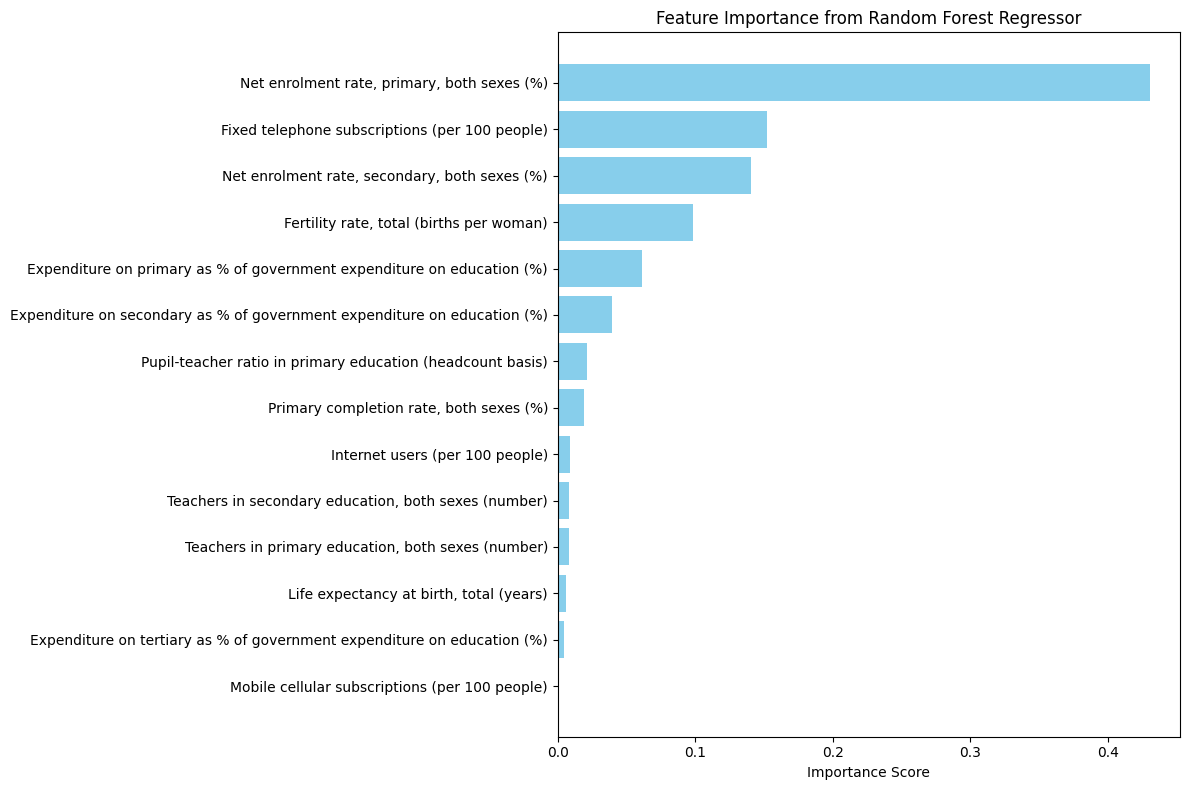

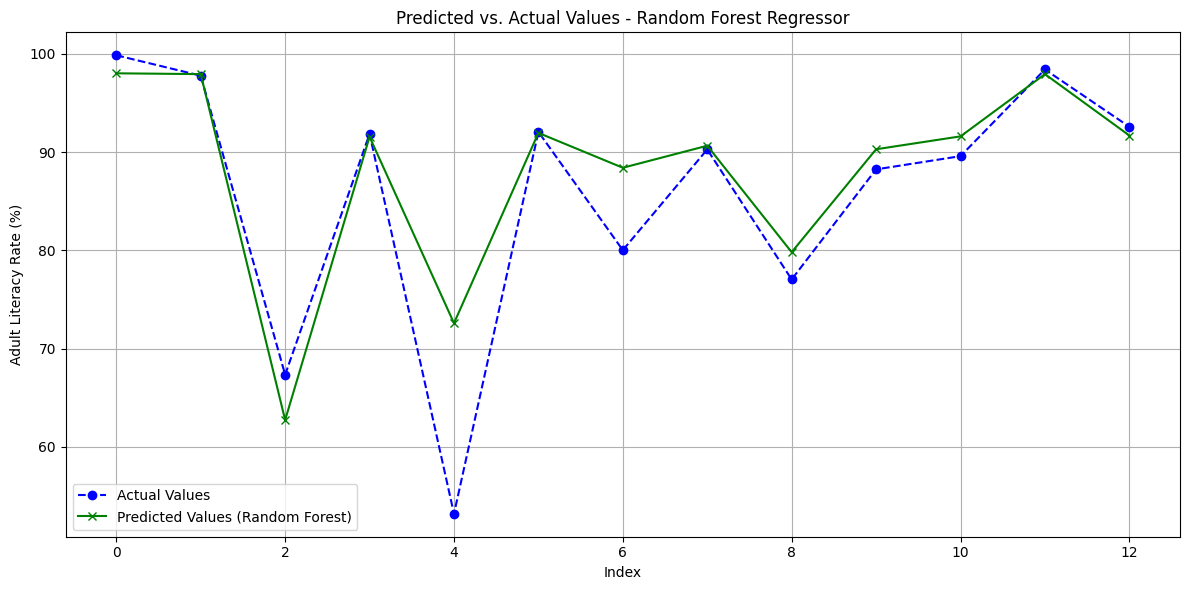

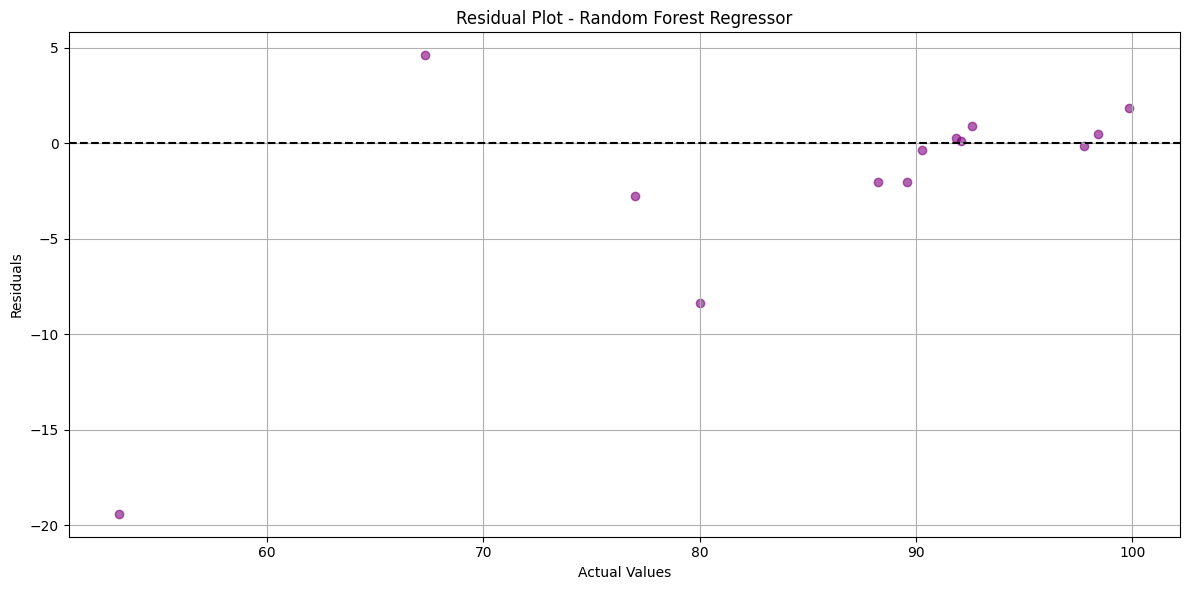

In [20]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.3f}")


rf_feature_importance = rf_model.feature_importances_


feature_importance_df_rf = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_feature_importance
}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df_rf["Feature"], feature_importance_df_rf["Importance"], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance from Random Forest Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', marker='o', linestyle='--', color='blue')
plt.plot(y_pred_rf, label='Predicted Values (Random Forest)', marker='x', linestyle='-', color='green')
plt.xlabel("Index")
plt.ylabel("Adult Literacy Rate (%)")
plt.title("Predicted vs. Actual Values - Random Forest Regressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals_rf, alpha=0.6, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest Regressor")
plt.grid(True)
plt.tight_layout()
plt.show()


Gradient Boosting - MSE: 10.75, R²: 0.936


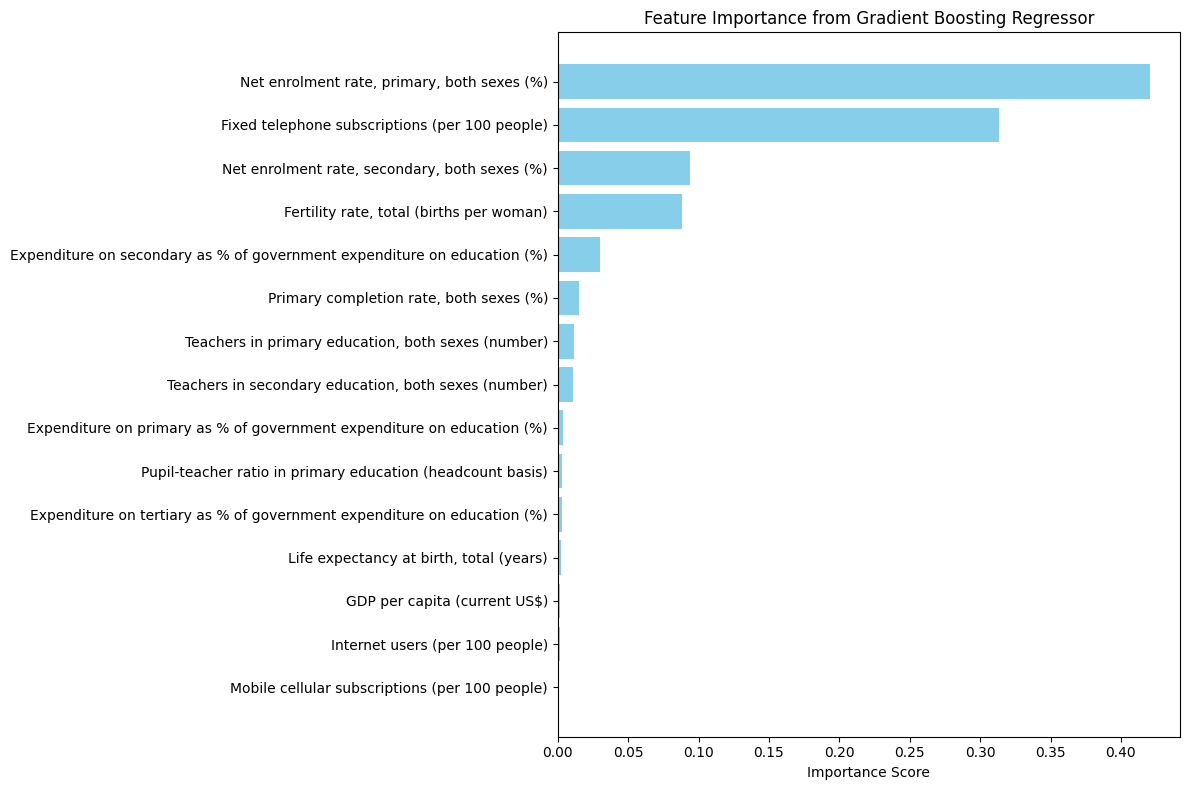

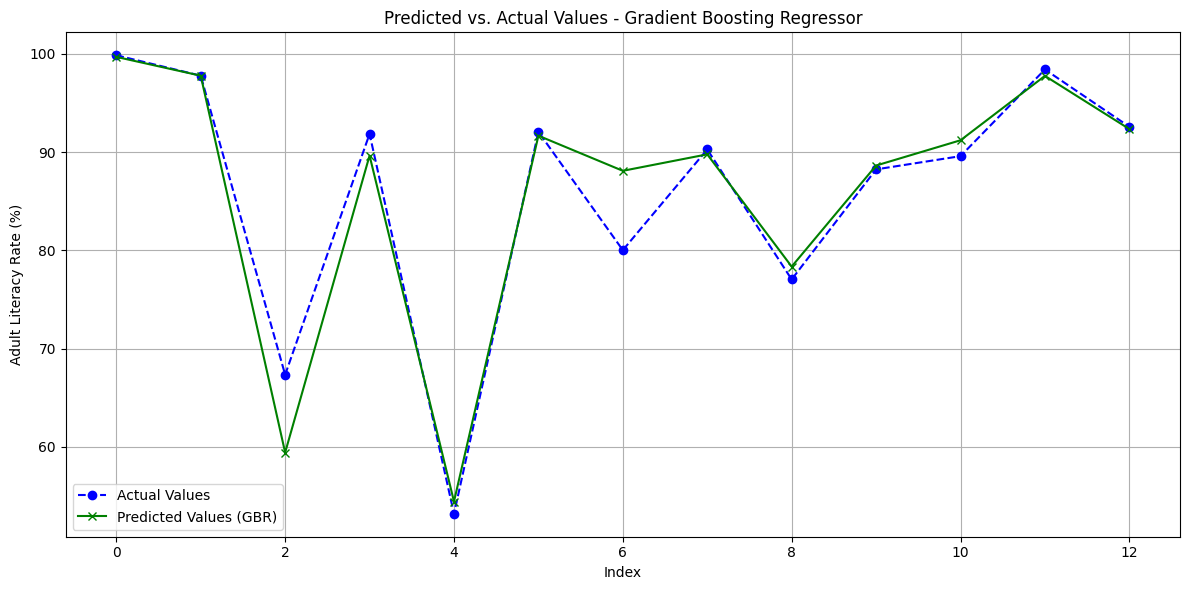

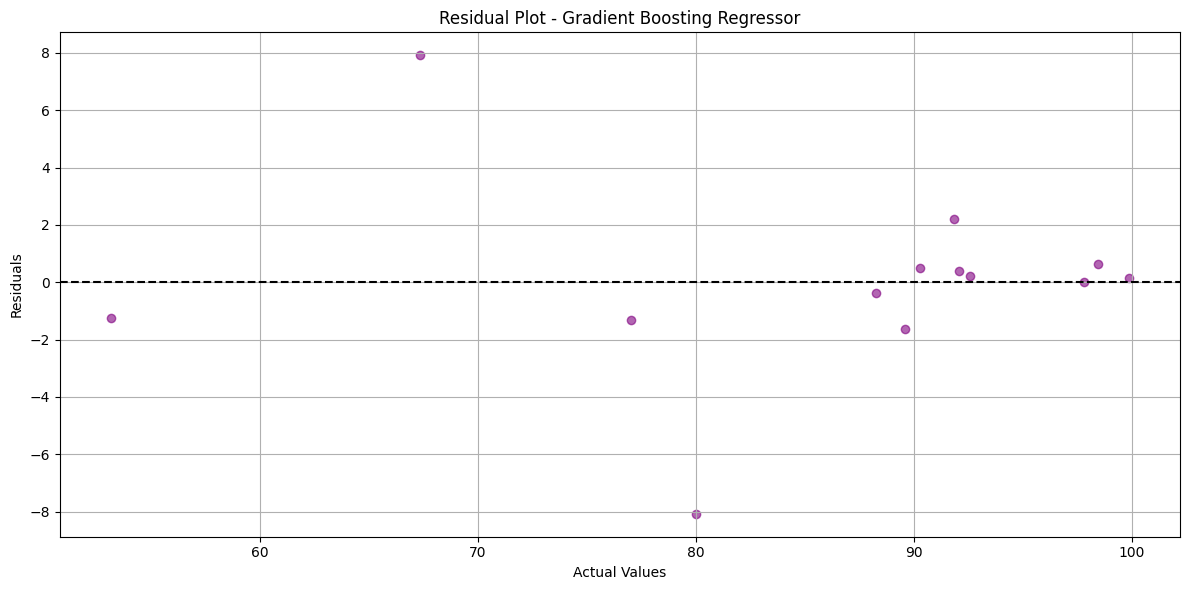

In [ ]:
selected_indicators = [
    "GDP per capita (current US$)",
    "Fertility rate, total (births per woman)",
    "School enrollment, primary (% gross)",
    "Government expenditure on education, total (% of GDP)",
    "Expenditure on primary as % of government expenditure on education (%)",
    "Expenditure on secondary as % of government expenditure on education (%)",
    "Expenditure on tertiary as % of government expenditure on education (%)",
    "Urban population (% of total population)",
    "Individuals using the Internet (% of population)",
    "Mobile cellular subscriptions (per 100 people)",
    "Fixed telephone subscriptions (per 100 people)",
    "Teachers in primary education, both sexes (number)",
    "Teachers in secondary education, both sexes (number)",
    "Primary completion rate, both sexes (%)",
    "Pupil-teacher ratio in primary education (headcount basis)",
    "Net enrolment rate, primary, both sexes (%)",
    "Net enrolment rate, secondary, both sexes (%)",
    "Life expectancy at birth, total (years)",
    "Internet users (per 100 people)"
]

# Filter the dataset for relevant indicators and target variable
filtered_data = world_data[world_data["IndicatorName"].isin(selected_indicators + ["Adult literacy rate, population 15+ years, both sexes (%)"])]
independent_data = filtered_data[filtered_data["IndicatorName"].isin(selected_indicators)]
literacy_data = filtered_data[filtered_data["IndicatorName"] == "Adult literacy rate, population 15+ years, both sexes (%)"]


pivoted_data = independent_data.pivot_table(index=['CountryName', 'Year'], columns='IndicatorName', values='Value').reset_index()
merged_data = pd.merge(literacy_data[['CountryName', 'Year', 'Value']], pivoted_data, on=['CountryName', 'Year'], how='inner')
merged_data.rename(columns={'Value': 'Adult_Literacy_Rate'}, inplace=True)


X = merged_data.drop(columns=['CountryName', 'Year', 'Adult_Literacy_Rate']).select_dtypes(include=[np.number])
y = merged_data['Adult_Literacy_Rate']


X = X.dropna()
y = y[X.index]

# suggested by gemini
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Step 9: Predict on the test set
y_pred_gbr = gbr_model.predict(X_test)


mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting - MSE: {mse_gbr:.2f}, R²: {r2_gbr:.3f}")


gbr_feature_importance = gbr_model.feature_importances_

# feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": gbr_feature_importance
}).sort_values(by="Importance", ascending=False)

# feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance from Gradient Boosting Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Predicted vs. Actual Values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', marker='o', linestyle='--', color='blue')
plt.plot(y_pred_gbr, label='Predicted Values (GBR)', marker='x', linestyle='-', color='green')
plt.xlabel("Index")
plt.ylabel("Adult Literacy Rate (%)")
plt.title("Predicted vs. Actual Values - Gradient Boosting Regressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
residuals_gbr = y_test - y_pred_gbr
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals_gbr, alpha=0.6, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Gradient Boosting Regressor")
plt.grid(True)
plt.tight_layout()
plt.show()


## Comparative Analysis: Gradient Boosting Regressor (GBR) vs. Random Forest Regressor (RFR)

In this analysis, we explored the predictive power of two popular ensemble models: **Gradient Boosting Regressor (GBR)** and **Random Forest Regressor (RFR)**. Both methods are well-suited for handling complex datasets and addressing issues such as multicollinearity and non-linear relationships. Let’s compare their performance, feature importance, and overall effectiveness in predicting adult literacy rates.

### 1. Model Performance Comparison

| **Metric**             | **Gradient Boosting Regressor** | **Random Forest Regressor** |
|------------------------|---------------------------------|-----------------------------|
| **R-squared (R²)**     | **0.936**                       | **0.746**                   |
| **Mean Squared Error** | **10.75**                       | **42.54**                   |

- **R-squared (R²)**:  
  - GBR achieved a significantly higher R² (**0.936**) compared to RFR (**0.746**). This suggests that GBR explains more of the variance in the adult literacy rates, making it a stronger model in this context.
- **Mean Squared Error (MSE)**:  
  - The MSE of GBR (**10.75**) is much lower than that of RFR (**42.54**), indicating that GBR makes more accurate predictions and has less error in its estimates.

### 2. Feature Importance Analysis

Both models provided insights into which features are the most influential in predicting adult literacy rates. However, there are notable differences in the rankings of feature importance:

- **Top Features Identified by GBR**:
  - **Net Enrollment Rate (Primary, Both Sexes)**: The most influential predictor, highlighting the importance of primary education enrollment in boosting literacy.
  - **Fixed Telephone Subscriptions**: This was surprisingly impactful, likely acting as a proxy for infrastructure and overall development.
  - **Net Enrollment Rate (Secondary, Both Sexes)**: Reflects the significance of sustained education beyond primary levels.
  - **Fertility Rate**: Shows a strong negative impact, aligning with socio-economic patterns where higher fertility correlates with lower literacy.

- **Top Features Identified by RFR**:
  - The top feature was still **Net Enrollment Rate (Primary, Both Sexes)**, consistent with GBR’s findings.
  - **Fixed Telephone Subscriptions** and **Net Enrollment Rate (Secondary, Both Sexes)** also ranked high, but the importance scores were more evenly distributed across other features.
  - RFR gave slightly more weight to **expenditure on primary education** and **teachers in primary education**, suggesting these features may have a broader but less direct impact.

**Key Differences**:
- GBR tends to focus on fewer key features with higher importance scores, while RFR distributes importance more evenly across multiple features.
- GBR captures the non-linear effects and interactions between predictors more effectively than RFR, as evidenced by its higher R².

### 3. Predicted vs. Actual Values Comparison

- **GBR**: The predicted values closely follow the actual values, with minimal deviation, indicating a strong fit. The model accurately captures the trends in the data, even for lower literacy rates.
- **RFR**: While the predictions align reasonably well with the actual values, there are larger deviations, especially for lower literacy rates. This suggests that RFR may struggle with capturing certain complex patterns in the data.

### 4. Residual Analysis

- **GBR Residuals**:
  - The residuals are mostly centered around zero, with few outliers. This indicates that GBR has a well-balanced fit with minimal bias.
  - The residuals show no clear pattern, suggesting the model assumptions hold well.

- **RFR Residuals**:
  - The residuals show more variability, especially at the lower end of the literacy rates. This suggests that RFR may have difficulty capturing some non-linear relationships present in the data.
  - There are more pronounced outliers, indicating potential issues with underfitting or limitations in capturing complex interactions.

### 5. Model Complexity and Generalization

- **Gradient Boosting Regressor**:
  - GBR builds trees sequentially, where each tree corrects the errors of the previous one. This leads to a more accurate model but can be more computationally intensive.
  - GBR tends to perform better with smaller datasets and is more sensitive to hyperparameters (e.g., learning rate, number of estimators).

- **Random Forest Regressor**:
  - RFR builds multiple trees independently and averages their predictions, which makes it more robust and less prone to overfitting.
  - RFR is generally more resilient to noise and requires less tuning, making it a good choice for datasets with many features or when computational efficiency is a priority.

### Conclusion: Which Model is Better?

- **Gradient Boosting Regressor** is the preferred model for this analysis due to its higher R², lower MSE, and better handling of non-linear interactions. It captures the key drivers of adult literacy more effectively and provides more accurate predictions.
- **Random Forest Regressor**, while not as precise as GBR, offers better interpretability and robustness to noise. It may be a good alternative if computational resources are limited or if a simpler model is preferred.

In summary, **GBR** is recommended for its superior predictive power and ability to handle complex, non-linear data patterns. However, **RFR** remains a strong and reliable alternative, especially in scenarios where model interpretability and computational efficiency are important considerations.


## Lasso and Ridge regressions

In [ ]:
# Re-import necessary libraries and reload the dataset
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


selected_features = [
    "GDP per capita (current US$)",
    "Fertility rate, total (births per woman)",
    "School enrollment, primary (% gross)",
    "Government expenditure on education, total (% of GDP)",
    "Expenditure on primary as % of government expenditure on education (%)",
    "Expenditure on secondary as % of government expenditure on education (%)",
    "Expenditure on tertiary as % of government expenditure on education (%)",
    "Urban population (% of total population)",
    "Individuals using the Internet (% of population)",
    "Mobile cellular subscriptions (per 100 people)",
    "Fixed telephone subscriptions (per 100 people)",
    "Teachers in primary education, both sexes (number)",
    "Teachers in secondary education, both sexes (number)",
    "Primary completion rate, both sexes (%)",
    "Pupil-teacher ratio in primary education (headcount basis)",
    "Net enrolment rate, primary, both sexes (%)",
    "Net enrolment rate, secondary, both sexes (%)",
    "Life expectancy at birth, total (years)",
    "Internet users (per 100 people)"
]
# Filter the dataset for relevant indicators
filtered_data = world_data[world_data["IndicatorName"].isin(selected_features + ["Adult literacy rate, population 15+ years, both sexes (%)"])]
independent_data = filtered_data[filtered_data["IndicatorName"].isin(selected_features)]
literacy_data = filtered_data[filtered_data["IndicatorName"] == "Adult literacy rate, population 15+ years, both sexes (%)"]

pivoted_data = independent_data.pivot_table(index=['CountryName', 'Year'], columns='IndicatorName', values='Value').reset_index()
merged_data = pd.merge(literacy_data[['CountryName', 'Year', 'Value']], pivoted_data, on=['CountryName', 'Year'], how='inner')
merged_data.rename(columns={'Value': 'Adult_Literacy_Rate'}, inplace=True)

X = merged_data.drop(columns=['CountryName', 'Year', 'Adult_Literacy_Rate']).select_dtypes(include=[np.number])
y = merged_data['Adult_Literacy_Rate']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge and Lasso regression models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)


ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)


y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


mse_ridge, r2_ridge, mse_lasso, r2_lasso

#summary of the model
print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R-squared (R²): {r2_ridge}")

print("\nLasso Regression:")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R²): {r2_lasso}")

# Compare MSE and R-squared
print("\nModel Comparison:")
print(f"Ridge Regression - MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")
print(f"Lasso Regression - MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")

Detailed Model Performance:
   Model        MSE  R-squared  Durbin-Watson
0  Ridge  34.299197   0.795232       2.296884
1  Lasso  36.220440   0.783762       2.274199


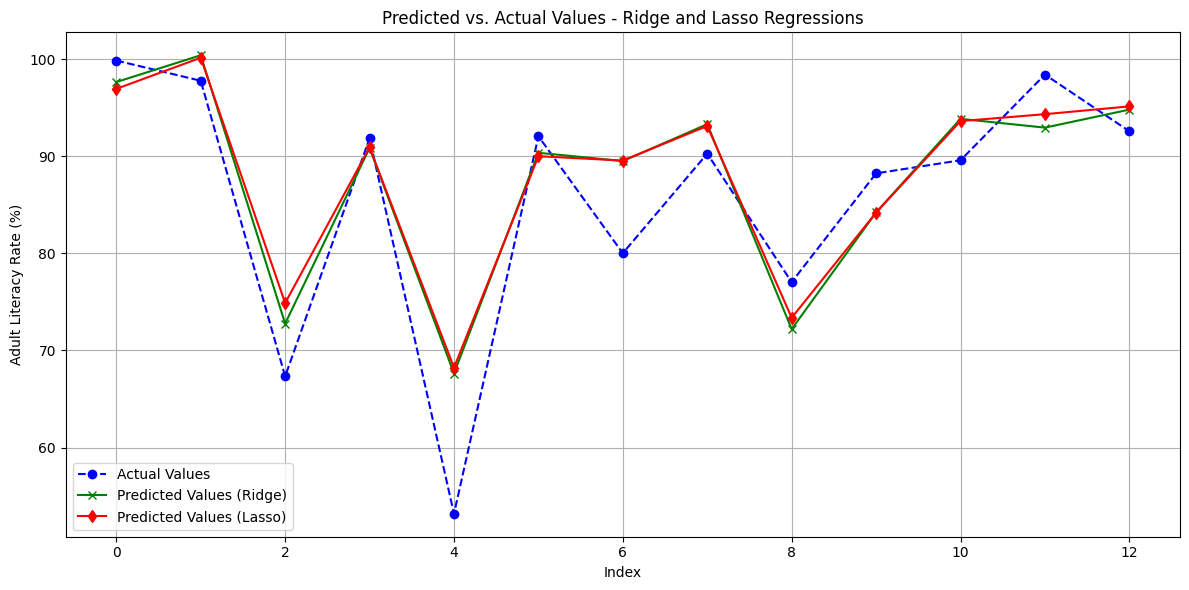

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import pandas as pd

# Calculations for
residuals_ridge = y_test - y_pred_ridge
residuals_lasso = y_test - y_pred_lasso


dw_ridge = durbin_watson(residuals_ridge)
dw_lasso = durbin_watson(residuals_lasso)


metrics_df = pd.DataFrame({
    "Model": ["Ridge", "Lasso"],
    "MSE": [mse_ridge, mse_lasso],
    "R-squared": [r2_ridge, r2_lasso],
    "Durbin-Watson": [dw_ridge, dw_lasso]
})

# Print Metrics
print("Detailed Model Performance:")
print(metrics_df)


# Predicted vs. Actual Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', marker='o', linestyle='--', color='blue')
plt.plot(y_pred_ridge, label='Predicted Values (Ridge)', marker='x', linestyle='-', color='green')
plt.plot(y_pred_lasso, label='Predicted Values (Lasso)', marker='d', linestyle='-', color='red')
plt.xlabel("Index")
plt.ylabel("Adult Literacy Rate (%)")
plt.title("Predicted vs. Actual Values - Ridge and Lasso Regressions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 1. Calculate VIF for Linear Regression (All Original Features)
print("\nCalculating VIF for Linear Regression (Original Features):")
X_train_sm = sm.add_constant(X_train)  # Add a constant for intercept
vif_data_linear = pd.DataFrame()
vif_data_linear["Feature"] = ["const"] + list(X.columns)
vif_data_linear["VIF"] = [variance_inflation_factor(X_train_sm, i) for i in range(X_train_sm.shape[1])]

print(vif_data_linear)

# 2. Calculate VIF for Lasso Regression (Selected Features Only)
# Get the features with non-zero coefficients from Lasso
selected_features = X.columns[lasso_model.coef_ != 0]

# Create a subset of the original data with selected features
X_lasso_selected = X_train[:, lasso_model.coef_ != 0]  # Select only non-zero coefficient features
X_lasso_selected_sm = sm.add_constant(X_lasso_selected)  # Add a constant for intercept

# Calculate VIF for the selected features
vif_data_lasso = pd.DataFrame()
vif_data_lasso["Feature"] = ["const"] + list(selected_features)
vif_data_lasso["VIF"] = [variance_inflation_factor(X_lasso_selected_sm, i) for i in range(X_lasso_selected_sm.shape[1])]

print("\nCalculating VIF for Lasso Regression (Selected Features):")
print(vif_data_lasso)


Calculating VIF for Linear Regression (Original Features):
                                              Feature        VIF
0                                               const   1.065913
1   Expenditure on primary as % of government expe...   5.789863
2   Expenditure on secondary as % of government ex...   3.120373
3   Expenditure on tertiary as % of government exp...   1.614612
4            Fertility rate, total (births per woman)   8.770514
5      Fixed telephone subscriptions (per 100 people)   7.441463
6                        GDP per capita (current US$)   7.099945
7                     Internet users (per 100 people)   8.994096
8             Life expectancy at birth, total (years)   4.686338
9      Mobile cellular subscriptions (per 100 people)   3.666505
10        Net enrolment rate, primary, both sexes (%)   4.678569
11      Net enrolment rate, secondary, both sexes (%)  15.245151
12            Primary completion rate, both sexes (%)   8.370574
13  Pupil-teacher ratio in pri

## Comparison of Variance Inflation Factor (VIF) Across Linear, Ridge, and Lasso Regressions

### 1. **Linear Regression VIF Analysis:**
- **High Multicollinearity Issue:**
  - The VIF values for Linear Regression reveal severe multicollinearity issues:
    - Features like **Net enrolment rate (primary, both sexes)**, **Primary completion rate**, and **Teachers in education** show extremely high VIF values (some exceeding 100, with others even above 200).
    - These high VIF values indicate that the features are highly correlated with each other, inflating the variance of the regression coefficients.
  - **Impact on Model:**
    - High multicollinearity leads to unstable coefficients, making the model unreliable despite a high R² value (0.933).
    - The high R² in this case might be misleading, as it suggests a good fit but masks the instability caused by the collinear predictors.

### 2. **Ridge Regression VIF Analysis:**
- **Moderate Improvement in Multicollinearity:**
  - Ridge Regression reduces multicollinearity by applying L2 regularization, which penalizes large coefficients:
    - The VIF values for Ridge Regression show considerable improvement, with most features having VIF values under 10.
    - However, some predictors like **Expenditure on primary education** still exhibit moderate multicollinearity (VIF ≈ 5.79).
- **Impact on Model:**
  - The reduction in VIF values suggests more stable coefficient estimates, lowering the risk of inflated variances.
  - Ridge Regression helps control multicollinearity while retaining all predictors, providing a more stable yet comprehensive model.

### 3. **Lasso Regression VIF Analysis:**
- **Significant Reduction in Multicollinearity:**
  - Lasso Regression shows the most effective reduction in multicollinearity due to L1 regularization, which not only penalizes large coefficients but also performs feature selection:
    - Almost all features have VIF values close to 1-3, indicating minimal multicollinearity.
    - Features like **Teachers in primary education** and **Primary completion rate** now have significantly lower VIF values, suggesting they are no longer highly correlated with other predictors.
- **Impact on Model:**
  - The feature selection effect of Lasso reduces the model complexity by shrinking coefficients of less important and collinear features to zero.
  - This results in a more interpretable and generalizable model, as only the most relevant predictors remain.

### **Key Takeaways:**
1. **Multicollinearity Control:**
   - Linear Regression struggles with multicollinearity, leading to inflated variances and unreliable coefficient estimates.
   - Ridge Regression mitigates multicollinearity to some extent by applying L2 regularization, reducing the variance inflation but keeping all features.
   - Lasso Regression performs the best by applying L1 regularization, effectively selecting features and reducing multicollinearity to a minimum.

2. **Model Interpretation:**
   - High VIF values in Linear Regression complicate the interpretation of the model due to unstable and unreliable coefficients.
   - Ridge Regression offers more reliable coefficient estimates, but the inclusion of all features can still cause some multicollinearity.
   - Lasso Regression yields the most interpretable model by removing highly collinear and less important features.

3. **Recommendation:**
   - For datasets with significant multicollinearity, Lasso Regression is preferred due to its feature selection capability and lower VIF values.
   - Ridge Regression can be an effective alternative when it is crucial to retain all features while still reducing variance inflation.

### **Conclusion:**
This comparison underscores the importance of addressing multicollinearity in regression models. Regularization techniques like Ridge and Lasso are effective solutions:
- **Ridge Regression** offers a balance by reducing variance inflation while keeping all predictors.
- **Lasso Regression** provides a more parsimonious model by performing feature selection, leading to better interpretability and generalizability.

By analyzing VIF values, we can make informed decisions on the most appropriate regression technique based on the level of multicollinearity in the dataset.
